In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from pylab import figure, text, scatter, show

### Load The Data

In [35]:
x = 0.6 
miu = 2/(1+x)
R = [*range(int(2e9),int(30e9),10000)]
print(miu)

1.25


In [36]:
R_pandas1 = pd.Series(R)
R_pandas1_ = pd.DataFrame(R_pandas1)
Radius = R_pandas1_[0]
R_pandas1_['Radius'] = Radius
R_pandas1_.drop(columns = 0, inplace=True)
R_pandas1_.head()

,Radius
0,2000000000
1,2000010000
2,2000020000
3,2000030000
4,2000040000


### Plotting Central Temperature vs Mass Through Equation of State

In [37]:
def hitung(m):
    R_pandas = pd.Series(R)
    R_pandas_ = pd.DataFrame(R_pandas)
    Radius = R_pandas_[0]
    R_pandas_['Radius'] = Radius
    R_pandas_.drop(columns = 0, inplace=True)
    R_pandas_.head()
    
    R0 = 2.8e9*((1/(m))**(1/3))*(miu**(-5/3))
    
    psi = 1.9e-9*((1/m)**(4/3))*((R_pandas_['Radius']/R0)**(2))*(miu**(2/3))
    
    R_pandas_['psi'] = psi
    R_pandas_.head()
    
    c = (1-R_pandas_['Radius']/R0)
    b = ((2-R_pandas_['Radius']/R0)*R_pandas_['psi'])
    a = 2*(R_pandas_['psi']**2)
    R_pandas_['a'] = a
    R_pandas_['b'] = b
    R_pandas_['c'] = c
    
    d = (R_pandas_['b']**2)-(4*R_pandas_['a']*R_pandas_['c'])
    R_pandas_['d'] = d
    
    x1 = (-R_pandas_['b']+np.sqrt(R_pandas_['d']))/(2*R_pandas_['a'])
    R_pandas1_[m] = x1

0.05
0.060000000000000005
0.07
0.08000000000000002


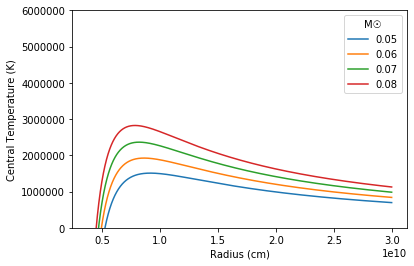

In [39]:
for m in np.arange(0.05,9e-2,1e-2):
    hitung(m)
    print(m)
    plt.plot(R_pandas1_['Radius'],R_pandas1_[m])
    plt.ylim(0,6e6)
    plt.xlabel("Radius (cm)")
    plt.ylabel("Central Temperature (K)")
    plt.gca().legend(("0.05","0.06",'0.07','0.08','0.09','0.1'),title='M☉')
    # sumbu y adalah temperatur dalam Kelvin, sumbu x adalah radius, setiap warna menyatakan massa dalam satuan massa matahari

In [40]:
R_pandas1_.tail()

,Radius,0.05,0.060000000000000005,0.07,0.08000000000000002
2799995,29999950000,695447.774802,838787.080816,982386.778921,1.126189e+06
2799996,29999960000,695447.563452,838786.823320,982386.475033,1.126189e+06
2799997,29999970000,695447.352102,838786.565824,982386.171145,1.126188e+06
2799998,29999980000,695447.140753,838786.308328,982385.867258,1.126188e+06
2799999,29999990000,695446.929403,838786.050833,982385.563370,1.126188e+06


### Take Up The Maximum Value From Central Temperature for Every Mass

In [45]:
T = list()
R = list()
U = list()

for m in np.arange(0.05,9e-2,1e-2):
    x = R_pandas1_[m].max()
    y = 2e9+(10000*R_pandas1_[m].idxmax())
    T.append(x)
    R.append(y)
    U.append(m)

In [46]:
R_pandas2 = pd.Series(T)
R_pandas21 = pd.Series(R)
R_pandas22 = pd.Series(U)
R_pandas2_ = pd.DataFrame(R_pandas2)
R_pandas21_ = pd.DataFrame(R_pandas21)
R_pandas22_ = pd.DataFrame(R_pandas22)
U = R_pandas22_[0]
T = R_pandas2_[0]
R = R_pandas21_[0]
R_pandas2_['M'] = U
R_pandas2_['T'] = T
R_pandas2_['R'] = R
R_pandas2_.drop(columns = 0, inplace=True)
R_pandas2_.head()

,M,T,R
0,0.05,1.508779e+06,9.155880e+09
1,0.06,1.923980e+06,8.616020e+09
2,0.07,2.362996e+06,8.184480e+09
3,0.08,2.823485e+06,7.828170e+09


Text(0, 0.5, 'Central Temperature Maximum (K)')

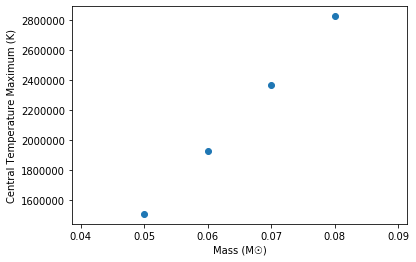

In [47]:
plt.scatter(R_pandas2_['M'],R_pandas2_['T'])
plt.xlabel("Mass (M☉)")
plt.ylabel("Central Temperature Maximum (K)")
# sumbu y adalah temperatur central maksimum, sumbu x adalah massa

### Find The Linear Regression Equation 

Because the distribution value from Central Temperature Maximum vs Mass curve almost linear, the linear regression would fit into the distribution value

In [48]:
R_pandas2_.drop(columns = 'R', inplace=True)
R_pandas2_.head()

,M,T
0,0.05,1.508779e+06
1,0.06,1.923980e+06
2,0.07,2.362996e+06
3,0.08,2.823485e+06


In [49]:
x = R_pandas2_['M'].values[:,np.newaxis]
y = R_pandas2_['T'].values[:,np.newaxis]
x,y

(array([[0.05],
        [0.06],
        [0.07],
        [0.08]]), array([[1508778.7401427 ],
        [1923979.98865542],
        [2362995.72970278],
        [2823485.31149844]]))

Tcmax =  -694228.1033246433 + 43831354.551145844 x
R2 score:  0.9994662068907676
µe = 1.25


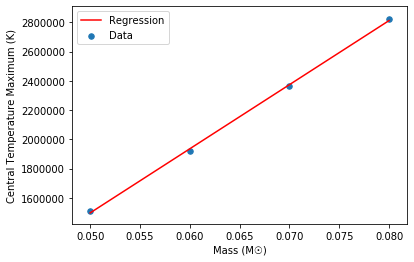

In [50]:
model = LinearRegression()
model.fit(x, y)
y_predicted = model.predict(x)
r2 = r2_score(y, y_predicted)

print('Tcmax = ', float(model.intercept_),'+', float(model.coef_),'x')
print('R2 score: ', r2)
print('µe =',miu)
 
plt.plot(x, y_predicted, color='r')
plt.scatter(x, y, s=30)
plt.xlabel("Mass (M☉)")
plt.ylabel("Central Temperature Maximum (K)")
plt.gca().legend(('Regression','Data'))
plt.show()

In [17]:
R_pandas2_.to_csv('miu 1,25.csv')